## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

## LOADING DATA 

In [2]:
mooc_data=pd.read_csv('g:/mooc_survey.csv')
mooc_data.head(10)

,SNO,GENDER,AGE,DIVISION,MAJOR,CERTIFICATION,PLATFORM,KAC1,KAC2,KAC3,...,PU4,PEOU1,PEOU2,PEOU3,BI1,BI2,BI3,AB1,AB2,AB3
0,1,Male,21,North,Computer Science Engineering,No,Coursera,4.0,5.0,3.0,...,5.0,4.0,5.0,3.0,4.0,4.0,4.0,1.0,1.0,2.0
1,2,Male,21,South,Computer Science Engineering,Yes,"Coursera, Udemy, NPTEL",2.0,2.0,1.0,...,5.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,5.0
2,3,Female,20,South,Mechatronics,No,"Coursera, Open Learning",2.0,1.0,5.0,...,4.0,5.0,5.0,4.0,2.0,4.0,4.0,3.0,5.0,4.0
3,4,Female,20,North,Computer Science Engineering,No,"Coursera, Udemy",2.0,4.0,3.0,...,3.0,5.0,3.0,4.0,4.0,3.0,3.0,5.0,3.0,3.0
4,5,Female,21,North,Computer Science Engineering,No,Open Learning,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Female,28,South,Computer Science Engineering,No,"Coursera, Udemy, Udacity, Swayam,",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,30,South,Electronics and Communication Engineering,No,Coursera,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Female,22,North,Information Technology,Yes,Open Learning,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
8,9,Female,22,North,Computer Science Engineering,No,Open Learning,5.0,4.0,5.0,...,4.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0
9,10,Male,23,South,Civil Engineering,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DATA PREPROCESSING

In [3]:
mooc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 33 columns):
SNO              200 non-null int64
GENDER           200 non-null object
AGE              200 non-null int64
DIVISION         200 non-null object
MAJOR            200 non-null object
CERTIFICATION    200 non-null object
PLATFORM         184 non-null object
KAC1             187 non-null float64
KAC2             187 non-null float64
KAC3             187 non-null float64
KAC4             187 non-null float64
KST1             187 non-null float64
KST2             187 non-null float64
KST3             187 non-null float64
KSH1             187 non-null float64
KSH2             187 non-null float64
KSH3             187 non-null float64
KAP1             187 non-null float64
KAP2             187 non-null float64
KAP3             187 non-null float64
PU1              187 non-null float64
PU2              187 non-null float64
PU3              187 non-null float64
PU4              187 non-null 

In [4]:
len(mooc_data.index)

200

In [5]:
mooc_data.describe()

,SNO,AGE,KAC1,KAC2,KAC3,KAC4,KST1,KST2,KST3,KSH1,...,PU4,PEOU1,PEOU2,PEOU3,BI1,BI2,BI3,AB1,AB2,AB3
count,200.000000,200.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,100.500000,21.040000,4.192513,4.213904,4.187166,4.064171,3.994652,4.101604,3.898396,3.486631,...,4.149733,4.064171,4.160428,3.823529,4.080214,3.844920,3.967914,4.149733,4.203209,3.748663
std,57.879185,4.523351,0.924777,0.884283,0.973987,0.913548,0.997294,0.953402,1.050012,1.245889,...,0.915246,0.970617,0.942392,1.034815,0.972185,1.068872,0.994089,0.949837,0.904820,1.124476
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,20.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.500000,3.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000
50%,100.500000,20.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,150.250000,21.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,200.000000,77.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
mooc_data.isnull()

,SNO,GENDER,AGE,DIVISION,MAJOR,CERTIFICATION,PLATFORM,KAC1,KAC2,KAC3,...,PU4,PEOU1,PEOU2,PEOU3,BI1,BI2,BI3,AB1,AB2,AB3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
mooc_data.isnull().sum()

SNO               0
GENDER            0
AGE               0
DIVISION          0
MAJOR             0
CERTIFICATION     0
PLATFORM         16
KAC1             13
KAC2             13
KAC3             13
KAC4             13
KST1             13
KST2             13
KST3             13
KSH1             13
KSH2             13
KSH3             13
KAP1             13
KAP2             13
KAP3             13
PU1              13
PU2              13
PU3              13
PU4              13
PEOU1            13
PEOU2            13
PEOU3            13
BI1              13
BI2              13
BI3              13
AB1              13
AB2              13
AB3              13
dtype: int64

In [8]:
mooc_data.dropna(axis=0,inplace=True)

## EXPLORATORY DATA ANALYSIS

In [9]:
mooc_data['DIVISION'].value_counts()

South    92
North    84
Name: DIVISION, dtype: int64

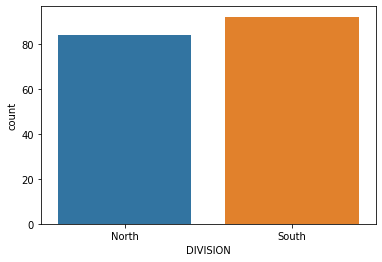

In [10]:
sns.countplot(x='DIVISION',data=mooc_data)

In [11]:
mooc_data['GENDER'].value_counts()

Female    95
Male      81
Name: GENDER, dtype: int64

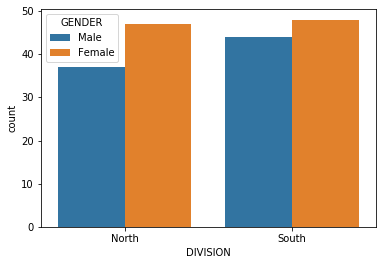

In [12]:
sns.countplot(x='DIVISION',hue='GENDER',data=mooc_data)

In [13]:
mooc_data['AGE'].value_counts(bins=5)

(17.939999999999998, 29.8]    173
(65.2, 77.0]                    1
(41.6, 53.4]                    1
(29.8, 41.6]                    1
(53.4, 65.2]                    0
Name: AGE, dtype: int64

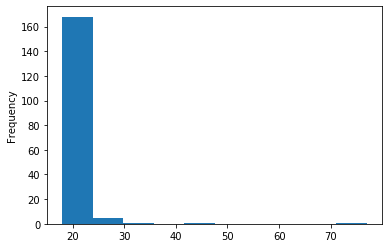

In [14]:
mooc_data['AGE'].plot.hist()

In [15]:
mooc_data['MAJOR'].value_counts()

Computer Science Engineering                   84
Electronics and Communication Engineering      24
Mechanical Engineering                         19
Civil Engineering                              14
Electricals and Eclectronics Engineering       13
Bio Technology                                  8
Electronics and Instrumentation Engineering     6
Information Technology                          5
Mechatronics                                    2
Aerospace Engineering                           1
Name: MAJOR, dtype: int64

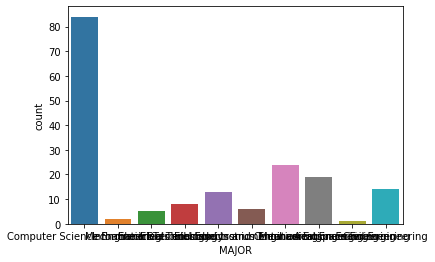

In [16]:
sns.countplot(x='MAJOR',data=mooc_data)

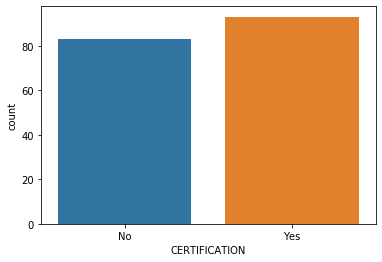

In [17]:
sns.countplot(x='CERTIFICATION',data=mooc_data)

## DESCRIPTIVE STATISTICS

In [18]:
#knowledge Acess- descriptive statistics
mooc_data[['KAC1','KAC2','KAC3','KAC4']].mean().sum()

16.75

In [19]:
mooc_data[['KAC1','KAC2','KAC3','KAC4']].std().sum()

3.6103037076301865

In [20]:
mooc_data[['KAC1','KAC2','KAC3','KAC4']].skew().sum()

-4.42563857655218

In [21]:
mooc_data[['KAC1','KAC2','KAC3','KAC4']].kurt().sum()

5.05261866922969

In [27]:
#KNOWLEDGE STORAGE -DESCRIPTIVE STATISTICS
mooc_data[['KST1','KST2','KST3']].mean().sum()

12.045454545454545

In [28]:
mooc_data[['KST1','KST2','KST3']].std().sum()

3.0296265061855903

In [29]:
mooc_data[['KST1','KST2','KST3']].skew().sum()

-2.8274168475605945

In [30]:
mooc_data[['KST1','KST2','KST3']].kurt().sum()

1.5151837971893092

In [31]:
#KNOWLEDGE SHARING - DESCRIPTIVE STATISTICS
mooc_data[['KSH1','KSH2','KSH3']].mean().sum()

10.585227272727272

In [32]:
mooc_data[['KSH1','KSH2','KSH3']].std().sum()

3.7115131946792914

In [33]:
mooc_data[['KSH1','KSH2','KSH3']].skew().sum()

-1.401552184031404

In [34]:
mooc_data[['KSH1','KSH2','KSH3']].kurt().sum()

-2.0697766852756496

In [36]:
#KNOWLEDGE APPLICATION - DESCRIPTIVE STATISTICS
mooc_data[['KAP1','KAP2','KAP3']].mean().sum()

12.613636363636363

In [37]:
mooc_data[['KAP1','KAP2','KAP3']].std().sum()

2.6284691443068593

In [38]:
mooc_data[['KAP1','KAP2','KAP3']].skew().sum()

-3.417208192156231

In [39]:
mooc_data[['KAP1','KAP2','KAP3']].kurt().sum()

4.139514962078895

In [162]:
#PERCEIVED USEFULNESS - DESCRIPTIVE STATISTICS
mooc_data[['PU1','PU2','PU3','PU4']].mean().sum()

16.698863636363637

In [163]:
mooc_data[['PU1','PU2','PU3','PU4']].std().sum()

3.5741327573084174

In [164]:
mooc_data[['PU1','PU2','PU3','PU4']].skew().sum()

-3.8277946229121014

In [165]:
mooc_data[['PU1','PU2','PU3','PU4']].kurt().sum()

2.7284068578527862

In [40]:
#PERCEIVED EASE OF USE - DESCRIPTIVE STATISTICS
mooc_data[['PEOU1','PEOU2','PEOU3']].mean().sum()

12.170454545454545

In [41]:
mooc_data[['PEOU1','PEOU2','PEOU3']].std().sum()

2.917025676372927

In [42]:
mooc_data[['PEOU1','PEOU2','PEOU3']].skew().sum()

-2.701505534739793

In [43]:
mooc_data[['PEOU1','PEOU2','PEOU3']].kurt().sum()

1.380600838668013

In [44]:
#BEHAVIOURAL INTENTION - DESCRIPTIVE STATISTICS
mooc_data[['BI1','BI2','BI3']].mean().sum()

11.948863636363637

In [45]:
mooc_data[['BI1','BI2','BI3']].std().sum()

3.0323789363564457

In [46]:
mooc_data[['BI1','BI2','BI3']].skew().sum()

-2.5807337706806788

In [47]:
mooc_data[['BI1','BI2','BI3']].kurt().sum()

0.9134780127392785

In [174]:
#ACTUAL BEHAVIOUR - DESCRIPTIVE STATISTICS
mooc_data[['AB1','AB2','AB3']].mean().sum()

12.176136363636365

In [175]:
mooc_data[['AB1','AB2','AB3']].std().sum()

2.969052377316567

In [176]:
mooc_data[['AB1','AB2','AB3']].skew().sum()

-2.960965417018483

In [177]:
mooc_data[['AB1','AB2','AB3']].kurt().sum()

1.8840094645347794